<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:azure;
           font-size:140%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:dimgray;">
Sleep Hour Difference between two groups 💤
</p>
</div>

This notebook 📗 contains a generated case of how a group difference can be viewed in light of simulations. 

Big reference for the methodology comes from an online [textbook](https://inferentialthinking.com/chapters/12/1/AB_Testing.html) called 
*Computational and Inferential Thinking: The Foundations of Data Science* by Ani Adhikari, John DeNero, David Wagner. The relevant portion is **Chapter 12: Comparing Two Samples - Section 1(A/B Testing)**. The reading is short, so if you like this notebook, you can check out the book as well. The book is freely available under the Creative Commons License. One note is that the book uses its own library so the codes might look different from typical library functions.

### **Table of Contents**

1) Data and the Question❓   
2) Methodology✏️  
3) Simulations▶️  
4) Empirical 𝒫-Value  
5) Decision✔️❎  
6) Comparison with t-test.

<p style='color:lightseagreen; font-size:140%'>Data and the Question❓</p>

First, libraries are imported.

In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

Data that will be used is a **generated data** of sleep hours of a sample of 175 students studying at <span style="color:deepskyblue;">Kaggle</span> University.

The codes used to generate the data can be seen below if you unhide them.

In [2]:
np.random.seed(2022)
generated = []
generated = generated + list(7+np.random.randn(90))
generated = generated + list(5.8+0.5*np.random.randn(30))
generated = generated + list((np.random.uniform(6,10,25)))
generated = generated + list(8+0.45*np.random.randn(30))
generated = list((np.array(generated)).round(1))

generated_2 = 10 * ['PhD'] + 25 * ['Master\'s'] + 40 * ['PhD'] + 45 * ['Master\'s'] + 30 * ['PhD'] + 25 * ['Master\'s']
np.random.shuffle(generated_2)

Data = pd.DataFrame({'Status': generated_2, 'Sleep Hours': generated})

Data['Sleep Hours'] = Data['Sleep Hours'] - 0.25 * (Data['Status'] == 'PhD')

In [3]:
Data.head(10)

,Status,Sleep Hours
0,Master's,7.00
1,Master's,6.70
2,PhD,6.65
3,Master's,9.00
4,PhD,7.05
5,Master's,7.80
6,Master's,7.30
7,Master's,7.50
8,PhD,7.15
9,Master's,7.40


In [4]:
Data.shape

(175, 2)

Data contains average sleep hours of 175 students.

In [5]:
pd.DataFrame(Data['Status'].value_counts())

,Status
Master's,95
PhD,80


There are 95 students pursuing Master's Degree, and 80 students in PhD programs.

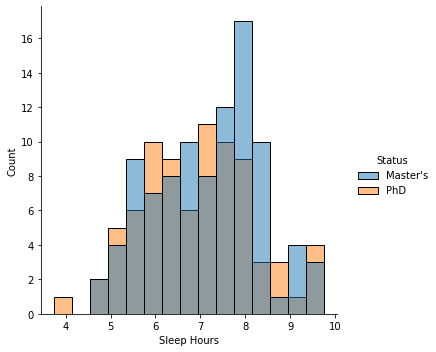

In [6]:
sns.displot(data = Data, x ='Sleep Hours', hue = 'Status', bins = 15)

In [7]:
pd.DataFrame(Data.groupby('Status')['Sleep Hours'].mean())

,Sleep Hours
Status,
Master's,7.164211
PhD,6.881250


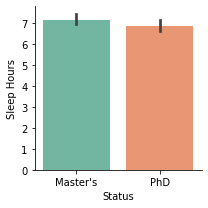

In [8]:
g = sns.catplot(
    data=Data, kind="bar",
    x="Status", y="Sleep Hours", palette = 'Set2', height = 3
)

#### ❓Question
> Are we seeing the sleep hour difference in the two groups merely due to '**chance variation**', or is there an **underlying difference** between the distributions of sleep hours between two populations (Master's and PhD)?

<p style='color:lightseagreen; font-size:140%'>Methodology✏️</p>

📝Null Hypothesis: There is **no underlying difference** between the sleep hours distribution of two populations (Master's and PhD students). This means that the difference that we observe in the sample is due to 'chance variation'.

📝Alternative Hypothesis: Mean Sleep Hours of the PhD students are **lower** than the Master's students.

Currently, the difference(**PhD - Master's**) between mean sleep hours of the two groups in our sample is:

In [9]:
Sample_Difference = Data.groupby('Status')['Sleep Hours'].mean()['PhD'] - Data.groupby('Status')['Sleep Hours'].mean()['Master\'s']
print(Sample_Difference)

-0.28296052631579016


In order to test these hypotheses, a set of simulations of group differences will be conducted.

The idea is this, that if there is no underlying difference between the two populations, then the labels of 'Master's' and 'PhD' Status shouldn't affect the mean. So for each simulation, **the labels of Status will be shuffled** , and the mean difference between the two groups will be calculated and stored. All of the stored mean differences then will be plotted as a histogram.

Below is an example of how **a shuffling** would work:

In [10]:
Data_Shuffled = Data.copy()

Data_Shuffled['Shuffled_Status'] = np.asarray(Data_Shuffled['Status'].sample(frac = 1))

Data_Shuffled.head(10)

,Status,Sleep Hours,Shuffled_Status
0,Master's,7.00,PhD
1,Master's,6.70,Master's
2,PhD,6.65,Master's
3,Master's,9.00,PhD
4,PhD,7.05,Master's
5,Master's,7.80,Master's
6,Master's,7.30,Master's
7,Master's,7.50,Master's
8,PhD,7.15,Master's
9,Master's,7.40,PhD


And with the above Shuffled_Status, the mean difference will be calculated again, as below.

In [11]:
Data_Shuffled[Data_Shuffled['Shuffled_Status'] == 'PhD']['Sleep Hours'].mean() - Data_Shuffled[Data_Shuffled['Shuffled_Status'] == 'Master\'s']['Sleep Hours'].mean()

0.03710526315789586

<p style='color:lightseagreen; font-size:140%'>Simulations▶️</p>

In [12]:
Simulated_Differences = []

n = 10000
np.random.seed(2023)

for i in range(0,n):
    Data_Shuffled = Data.copy()
    Data_Shuffled['Shuffled_Status'] = np.asarray(Data_Shuffled['Status'].sample(frac = 1))
    Data_Shuffled.head(10)
    Simulated_Differences.append(Data_Shuffled[Data_Shuffled['Shuffled_Status'] == 'PhD']['Sleep Hours'].mean() - Data_Shuffled[Data_Shuffled['Shuffled_Status'] == 'Master\'s']['Sleep Hours'].mean())
    
Simulated_Differences = np.asarray(Simulated_Differences)

<AxesSubplot:xlabel='Difference', ylabel='Count'>

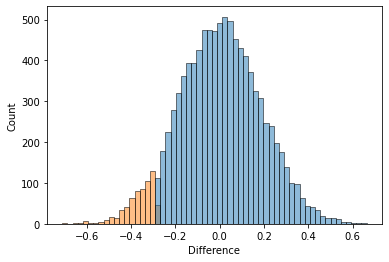

In [13]:
Table = pd.DataFrame({'Difference': Simulated_Differences, 'Color': ['1' if Difference <= Sample_Difference else '0' for Difference in Simulated_Differences]})
sns.histplot(data = Table, x = 'Difference', hue = 'Color', legend = False)

Orange portion represents the range of results that favor the alternative hypothesis (Simulated differences in the two groups equal or lower than the sample difference in the two groups).

<p style='color:lightseagreen; font-size:140%'>Empirical 𝒫-Value</p>

'Empirical P-value', using a 'simple proportion method' is found by the following:

How many simulated differences fall at or below the sample difference in the two groups? (thus in the favor of the alternative hypothesis)

- Reading from this [website](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC379178/), perhaps there is a strictly better/more correct estimate, but I don't think the value changes much.)

In [14]:
sum(Simulated_Differences < Sample_Difference) / len(Simulated_Differences)

0.064

<p style='color:lightseagreen; font-size:140%'>Decision✔️❎</p>

Using a significance level of 0.05, we see that the above proportion is higher than 0.05, and therefore we do not reject the Null Hypothesis.

<p style='color:lightseagreen; font-size:140%'>Comparison with t-test✏️</p>

This time, I'll conduct a **t-test** on the data.

This is a *Welch’s t-test*, where the two variances are not assumed to be equal

🖋 **Null Hypothesis**: The mean sleep hours 💤 of PhD students are equal to that of Master's students.  
🖋 **Alternative Hypothesis**: The mean sleep hours 💤 of PhD students is lower than that of Master's students.

In [15]:
T_Test = ttest_ind(Data[Data['Status'] == 'PhD']['Sleep Hours'], Data[Data['Status'] == 'Master\'s']['Sleep Hours'], 
         equal_var = False, random_state = 1017, alternative = 'less')

print('The Test Statistic is:', str(round(T_Test[0],3)))
print('The P-Value is', str(round(T_Test[1],3)))

The Test Statistic is: -1.529
The P-Value is 0.064


We got a very close P-Value here, and the decision is the same (**do not reject the Null Hypothesis**).
There is no significant evidence to say that the mean sleep hours of PhD students are lower than the Master's students.

**The End**

Let me know if you have any question/comment/constructive feedback!